# Figure 1

This notebook recreates a subset of the visualizations in figure 1 of the reference article for both the real and noise cells.

## 0. Initializations

In [1]:
# -- imports --
import anndata as ad
import numpy as np
import scanpy as sc

from scipy import sparse

from signals_in_the_noise.preprocessing.gse161529 import GSE161529

In [2]:
def get_combined_dataset(is_noise):
    adatas = []
    is_noise_val = 1 if is_noise else 0
    for idx, filename in enumerate(gse.EPI_CELL_TYPING_FILENAMES):
        adata = gse.get_dataset(filename)
        adata.obs_names = [f"{filename}_{i}" for i in range(adata.n_obs)]
        # filter to real cells
        adata = adata[adata.obs['is_noise']==is_noise_val].copy()
        adata = gse.annotate_epithial_cell_typing(adata)
        # remove stromal cells - "...removed the stromal subset..."
        mask = ~adata.obs['predicted_type'].str.lower().str.contains('stromal')
        adata = adata[mask].copy()
        # additional features for visualizations
        adata.obs['specimen_id'] = str(idx)
        adata.obs['hormonal_status'] = adata.uns['menopause_status']
        # just in case
        if sparse.issparse(adata.X):
            adata.X = adata.X.toarray()
        adatas.append(adata)
    return ad.concat(adatas, join='inner')

def figure_1_tsne(adata_all, color, use_raw=False):
    sc.pp.scale(adata_all)
    sc.pp.pca(adata_all, random_state=random_kwargs['random_state'])
    sc.pp.neighbors(adata_all, **random_kwargs)
    # use of leiden and resolution specified in caption for Figure 1E
    sc.tl.leiden(adata_all, resolution=0.015)
    sc.tl.tsne(adata_all, **random_kwargs)
    sc.pl.tsne(adata_all, color=color, use_raw=use_raw)

In [3]:
# -- dataset --
gse = GSE161529()

# -- constants --
random_kwargs = {'use_rep': 'X_pca', 'random_state': 43}

2025-07-13 15:03:16,428 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-07-13 15:03:16,519 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-07-13 15:03:16,645 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-07-13 15:03:16,701 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-07-13 15:03:16,838 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

In [4]:
# -- separate data on noise --
adata_all_real = get_combined_dataset(is_noise=False)
adata_all_noise = get_combined_dataset(is_noise=True)

Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to hig

In [17]:
thing = 1
match thing:
    case 1:
        print('hi')
    case _:
        print('no')

hi


## 1. Visualization B (density plot of CD59f and EpCAm expression)

### 1.1. Real Cells

### 1.2. Noise cells

## 2. Visualization C (t-SNE colored by tissue specimens)

### 2.1. Real cells

C:\Users\silly\AppData\Local\Temp\ipykernel_47680\4213602779.py:27: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_all, resolution=0.015)
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical


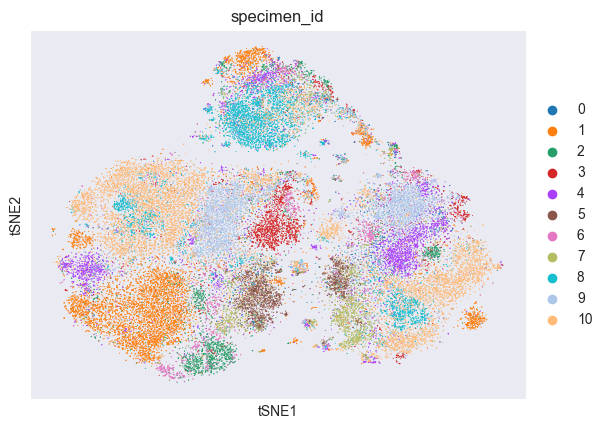

In [5]:
figure_1_tsne(adata_all_real, color=['specimen_id'])

### 2.2. Noise cells

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical


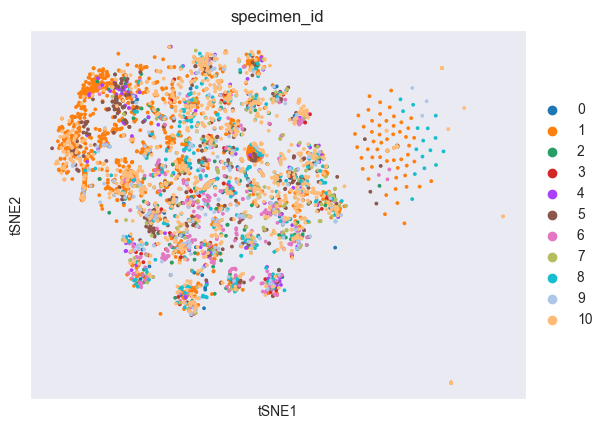

In [6]:
figure_1_tsne(adata_all_noise, color=['specimen_id'])

## 3. Visualization D (t-SNE colored by hormonal status)

### 3.1. Real cells

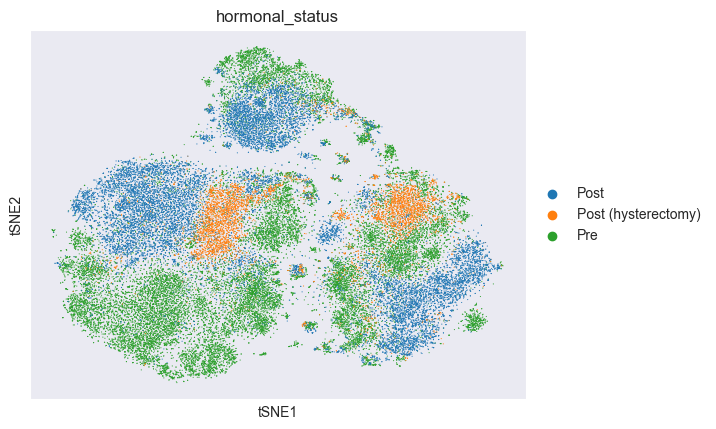

In [7]:
figure_1_tsne(adata_all_real, color=['hormonal_status'])

### 3.2. Noise cells

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


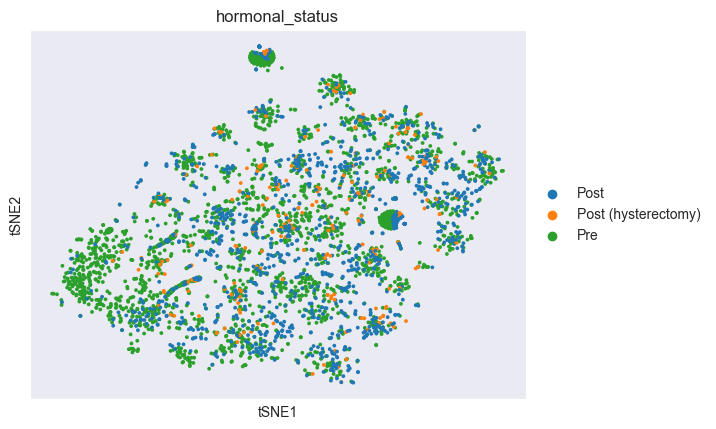

In [8]:
figure_1_tsne(adata_all_noise, color=['hormonal_status'])

## 4. Visualization E (t-SNE colored by cell clusters)

### 4.1. Real cells

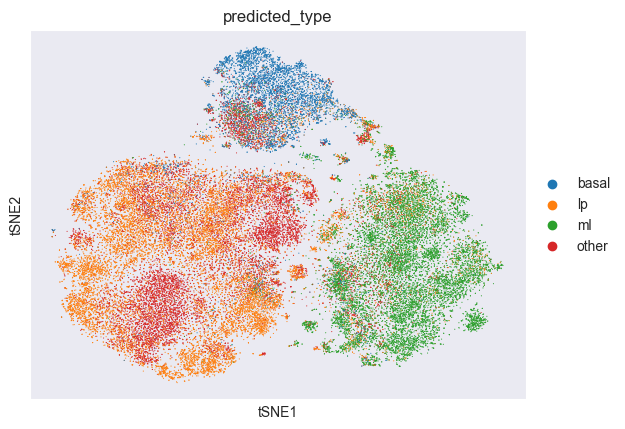

In [9]:
figure_1_tsne(adata_all_real, color=['predicted_type'])

### 4.2. Noise cells

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


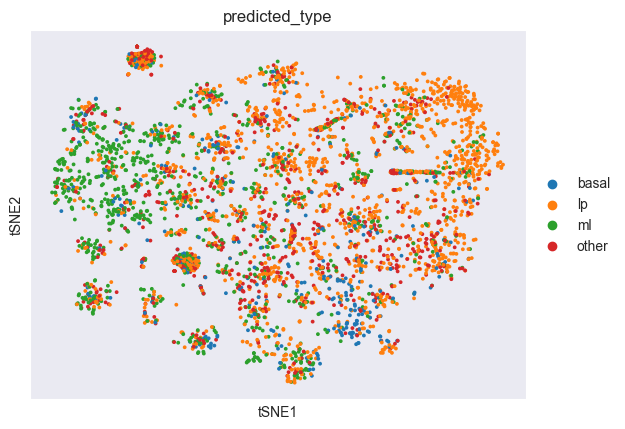

In [10]:
figure_1_tsne(adata_all_noise, color=['predicted_type'])

## 5. Visualization H (expression of marker genes)

In [13]:
adata = next(iter(gse.objects.values()))
genes = adata.var_names.tolist()
targets = [
    'EPCAM',
    'KRT5',
    'ACTA2',
    'MYLK',
    'SNAI2',
    'NOTCH4',
    'DKK3',
    'ITGA6',  # gene symbol for CD49f
    'ESR1',
    'PGR',
    'FOXA1',
    'TNFRSF11A',
    'KIT',
    'SOX10',
]
valid = [t for t in targets if t in genes]
missing = [t for t in targets if t not in genes]
len(targets) == len(valid), len(valid), len(missing)

(True, 14, 0)

In [ ]:
# adata.obs["EPCAM_EXPR"] = adata[:, "EPCAM"].X.toarray().flatten()
# epcam_expr = adata.obs["EPCAM_EXPR"]
# import seaborn as sns
# sns.histplot(epcam_expr)
# print("Min:", np.min(epcam_expr))
# print("Median:", np.median(epcam_expr))
# print("Max:", np.max(epcam_expr))
# print("90th percentile:", np.percentile(epcam_expr, 90))

In [ ]:
epcam_expr.describe()

### 5.1. Real Cells

### 5.2. Noise Cells

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


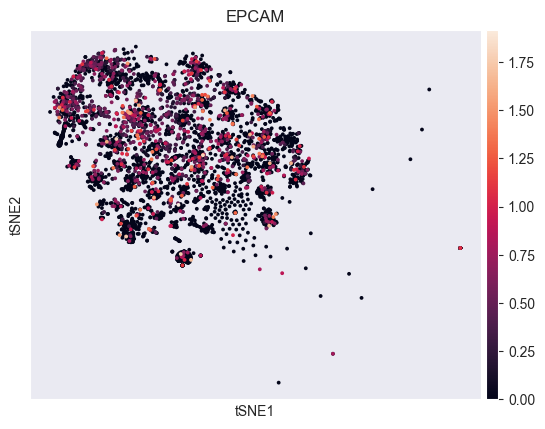

In [14]:
figure_1_tsne(adata_all_noise, color=[targets[0]], use_raw=True)